In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools

%matplotlib inline

In [3]:
# Wczytanie danych
df = pd.read_csv('final_dataset_modified.csv')

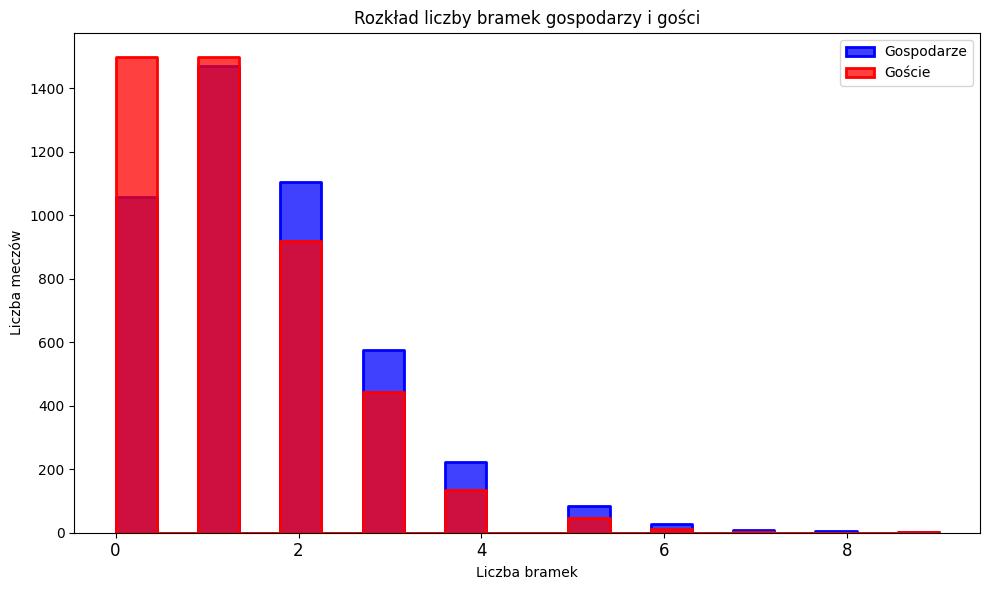

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['FTHG'], bins=20, color='blue', label='Gospodarze', kde=False, element="step", linewidth=2)
sns.histplot(df['FTAG'], bins=20, color='red', label='Goście', kde=False, element="step", linewidth=2)
plt.title("Rozkład liczby bramek gospodarzy i gości")
plt.xlabel("Liczba bramek")
plt.ylabel("Liczba meczów")
plt.legend()
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

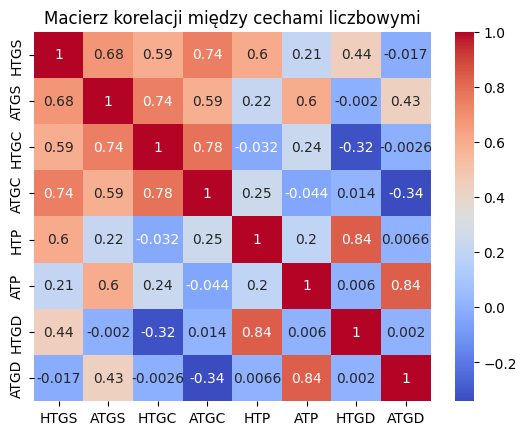

In [5]:
corr = df[['HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HTGD', 'ATGD']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Macierz korelacji między cechami liczbowymi")
plt.show()


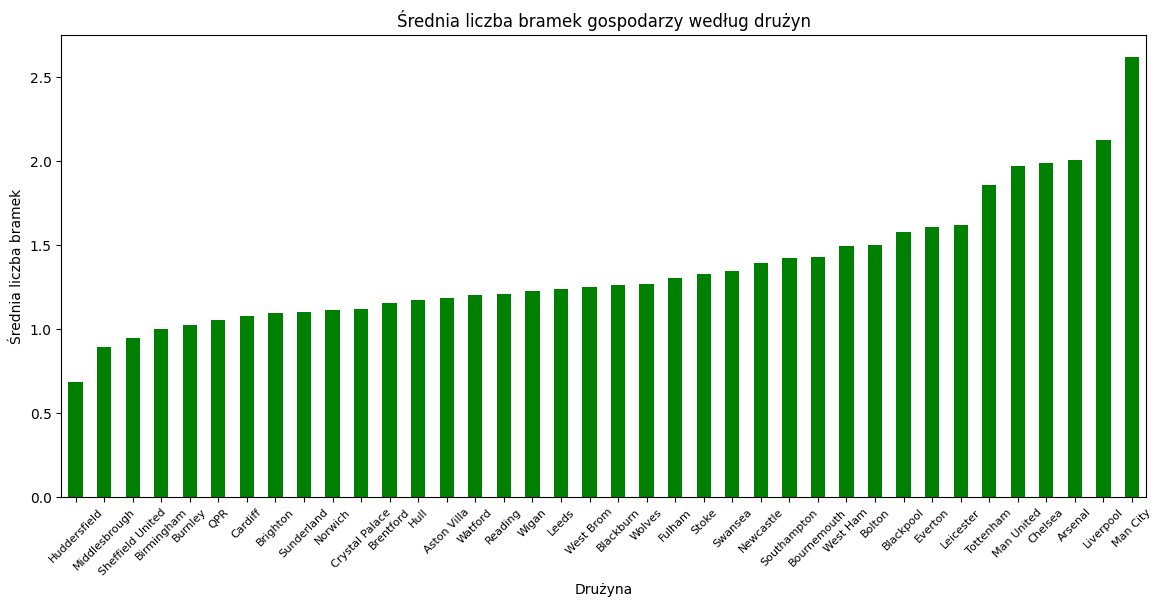

In [6]:
plt.figure(figsize=(14, 6))  # większy wykres
df.groupby('HomeTeam')['FTHG'].mean().sort_values().plot(kind='bar', color='green')
plt.title("Średnia liczba bramek gospodarzy według drużyn")
plt.ylabel("Średnia liczba bramek")
plt.xticks(rotation=45, fontsize=8)  # większa czcionka i mniejszy obrót
plt.xlabel("Drużyna", fontsize=10)
#plt.tight_layout()  # automatyczne dopasowanie marginesów
plt.show()

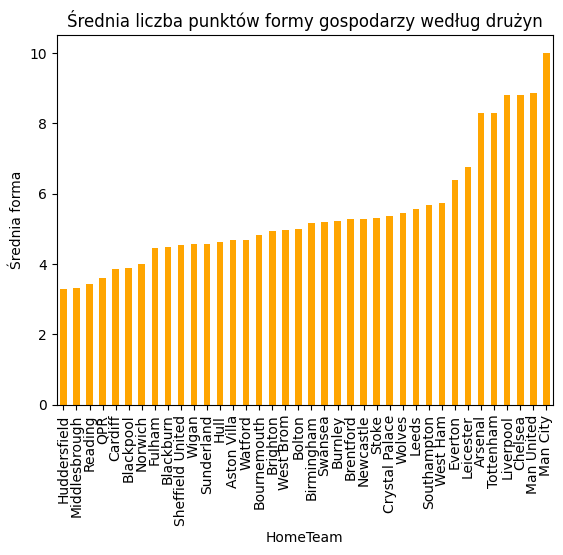

In [7]:
df.groupby('HomeTeam')['HTFormPts'].mean().sort_values().plot(kind='bar', color='orange')
plt.title("Średnia liczba punktów formy gospodarzy według drużyn")
plt.ylabel("Średnia forma")
plt.xticks(rotation=90)
plt.show()


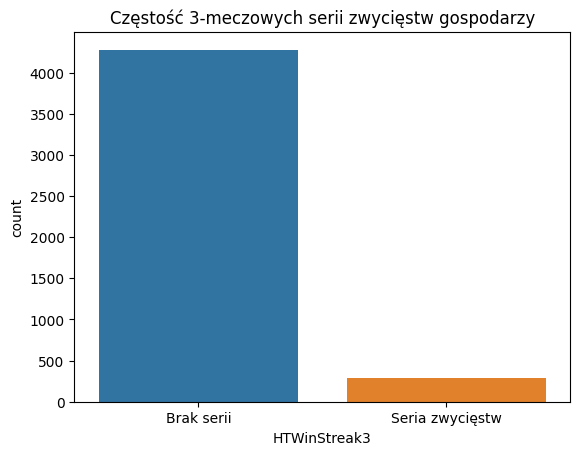

In [8]:
sns.countplot(x='HTWinStreak3', data=df)
plt.title("Częstość 3-meczowych serii zwycięstw gospodarzy")
plt.xticks([0, 1], ["Brak serii", "Seria zwycięstw"])
plt.show()


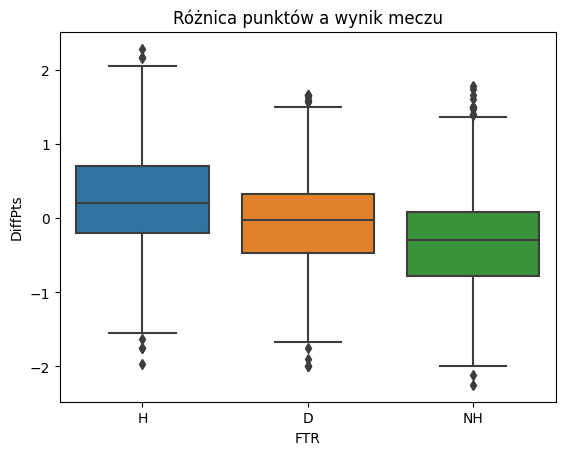

In [9]:
sns.boxplot(x='FTR', y='DiffPts', data=df)
plt.title("Różnica punktów a wynik meczu")
plt.show()


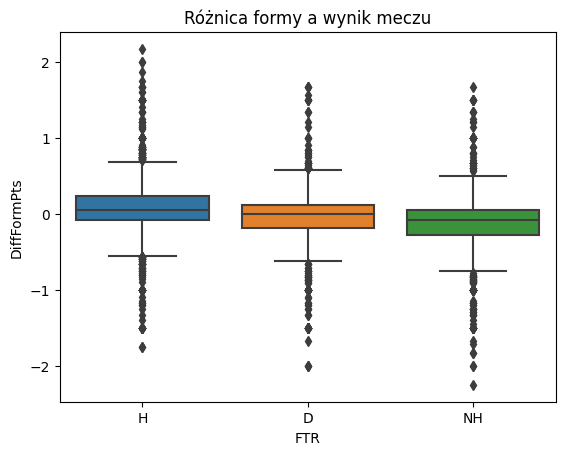

In [10]:
sns.boxplot(x='FTR', y='DiffFormPts', data=df)
plt.title("Różnica formy a wynik meczu")
plt.show()


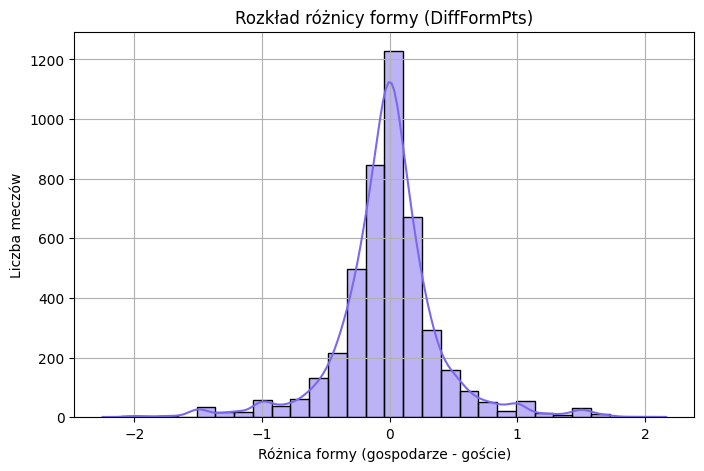

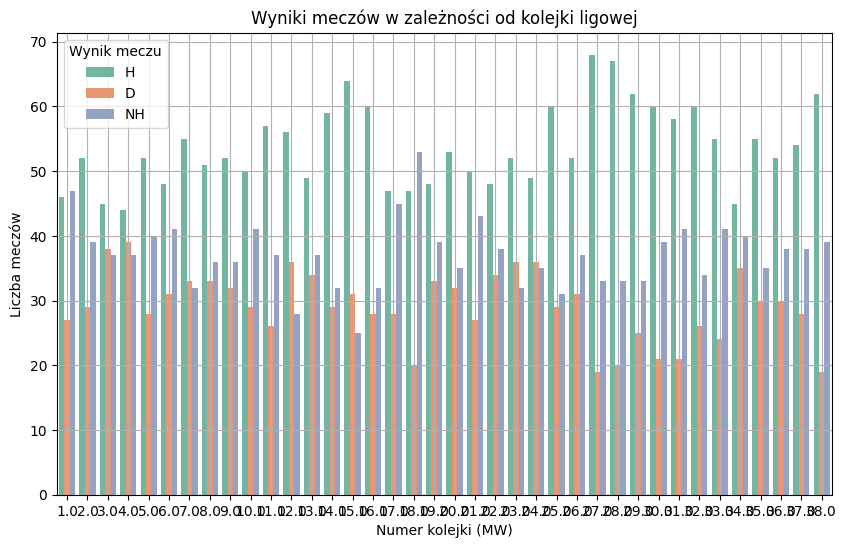

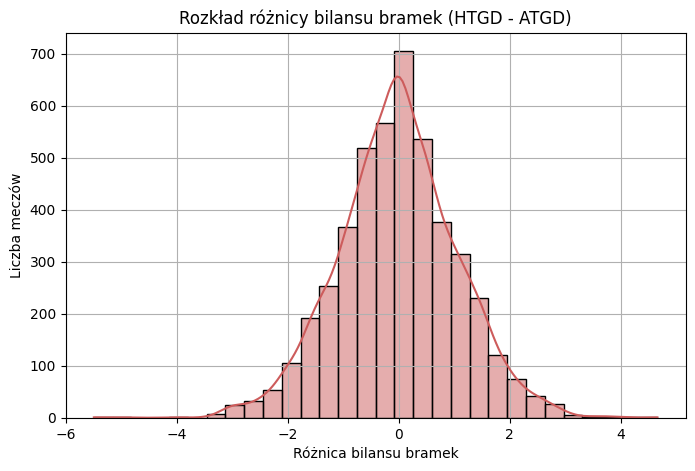

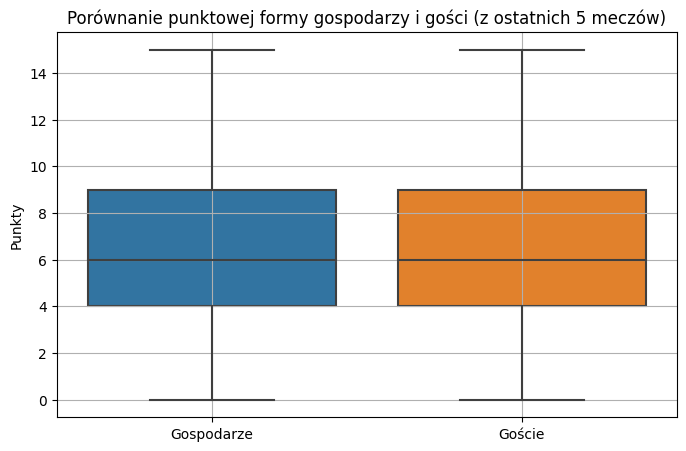

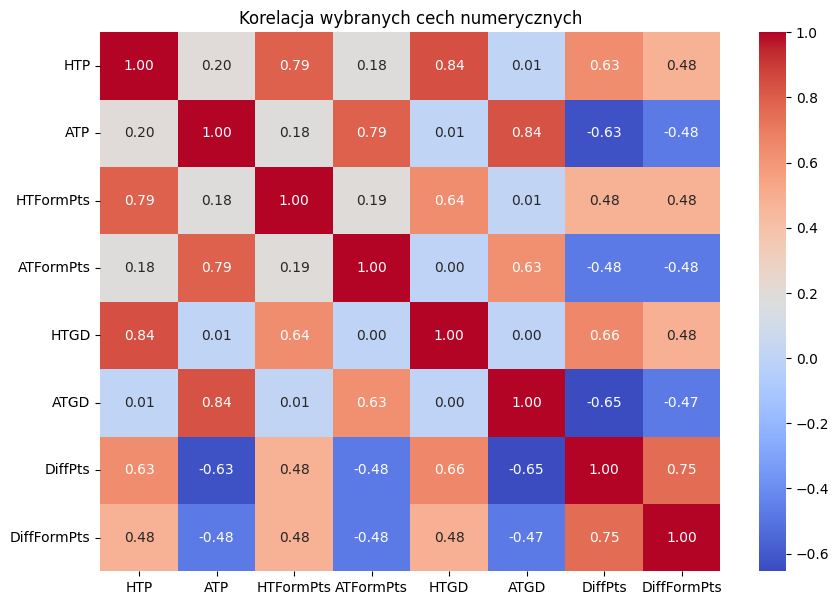

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Wykres 6: Rozkład różnicy formy między gospodarzami a gośćmi
plt.figure(figsize=(8, 5))
sns.histplot(df['DiffFormPts'], kde=True, bins=30, color='mediumslateblue')
plt.title('Rozkład różnicy formy (DiffFormPts)')
plt.xlabel('Różnica formy (gospodarze - goście)')
plt.ylabel('Liczba meczów')
plt.grid(True)
plt.show()

# Wykres 7: Wyniki meczów w zależności od kolejki
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='MW', hue='FTR', palette='Set2')
plt.title('Wyniki meczów w zależności od kolejki ligowej')
plt.xlabel('Numer kolejki (MW)')
plt.ylabel('Liczba meczów')
plt.legend(title='Wynik meczu')
plt.grid(True)
plt.show()

# Wykres 8: Rozkład różnicy bilansu bramek
plt.figure(figsize=(8, 5))
sns.histplot(df['HTGD'] - df['ATGD'], kde=True, bins=30, color='indianred')
plt.title('Rozkład różnicy bilansu bramek (HTGD - ATGD)')
plt.xlabel('Różnica bilansu bramek')
plt.ylabel('Liczba meczów')
plt.grid(True)
plt.show()

# Wykres 9: Porównanie formy drużyn gospodarzy i gości
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['HTFormPts', 'ATFormPts']])
plt.title('Porównanie punktowej formy gospodarzy i gości (z ostatnich 5 meczów)')
plt.ylabel('Punkty')
plt.xticks([0, 1], ['Gospodarze', 'Goście'])
plt.grid(True)
plt.show()

# Wykres 10: Korelacja wybranych cech
important_features = ['HTP', 'ATP', 'HTFormPts', 'ATFormPts', 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts']
plt.figure(figsize=(10, 7))
sns.heatmap(df[important_features].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelacja wybranych cech numerycznych')
plt.show()


<Axes: title={'center': 'Liczba meczów u siebie dla każdej drużyny'}>

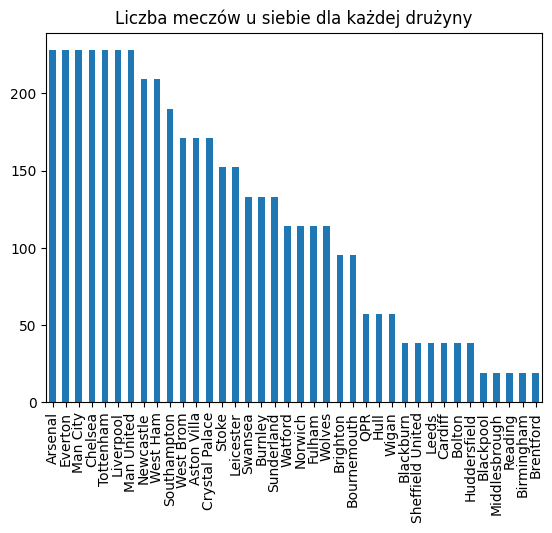

In [12]:
df['HomeTeam'].value_counts().plot(kind='bar', title='Liczba meczów u siebie dla każdej drużyny')


<Axes: title={'center': 'Liczba meczów na wyjeździe dla każdej drużyny'}>

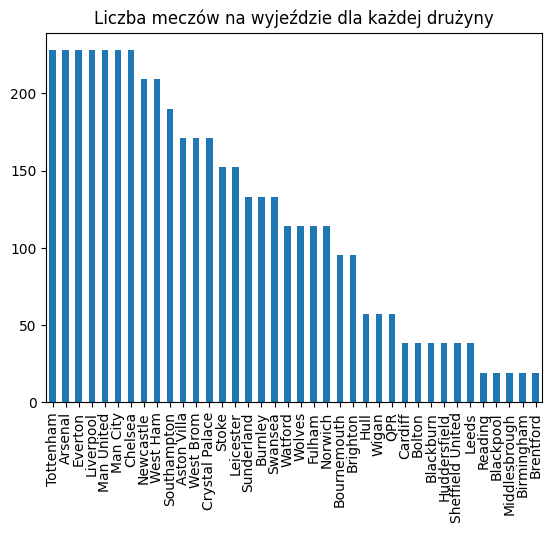

In [13]:
df['AwayTeam'].value_counts().plot(kind='bar', title='Liczba meczów na wyjeździe dla każdej drużyny')


[Text(0.5, 1.0, 'Rozkład bramek zdobytych przez gospodarzy')]

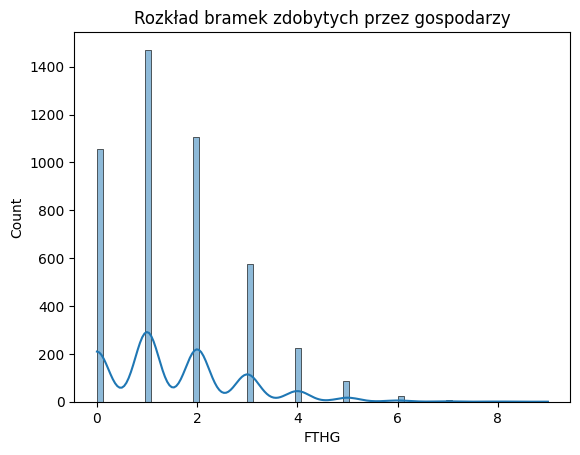

In [14]:
sns.histplot(df['FTHG'], kde=True).set(title='Rozkład bramek zdobytych przez gospodarzy')


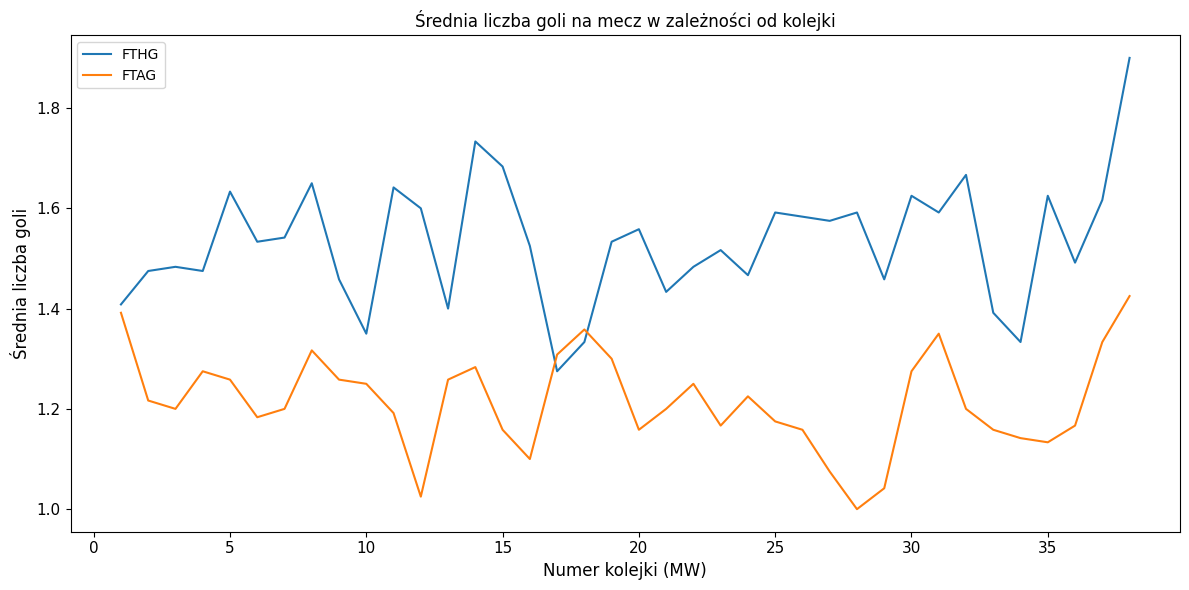

In [15]:
ax = df.groupby('MW')[['FTHG', 'FTAG']].mean().plot(figsize=(12, 6), title='Średnia liczba goli na mecz w zależności od kolejki')
ax.set_xlabel("Numer kolejki (MW)", fontsize=12)
ax.set_ylabel("Średnia liczba goli", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Procentowy podział wyników meczów'}, ylabel='FTR'>

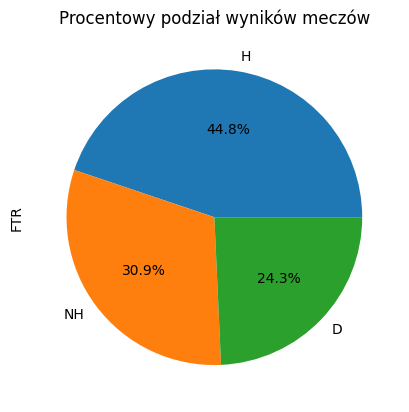

In [16]:
df['FTR'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Procentowy podział wyników meczów')


[Text(0.5, 1.0, 'Forma vs. Punkty gości')]

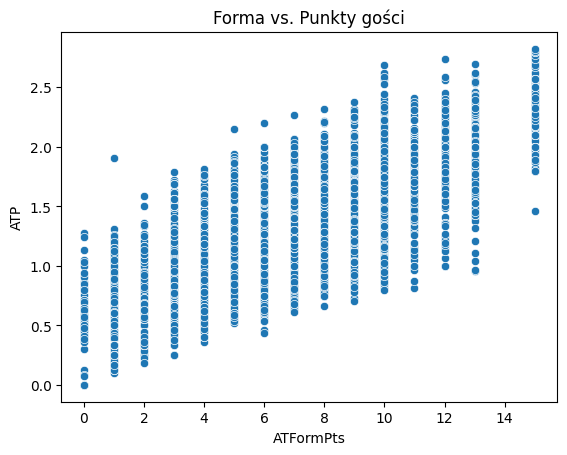

In [17]:
sns.scatterplot(x='ATFormPts', y='ATP', data=df).set(title='Forma vs. Punkty gości')


[Text(0.5, 1.0, 'Boxplot punktów gospodarzy i gości')]

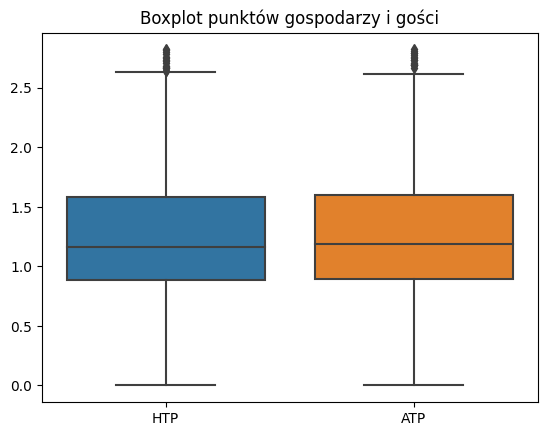

In [18]:
sns.boxplot(data=df[['HTP', 'ATP']]).set(title='Boxplot punktów gospodarzy i gości')


<Axes: title={'center': 'Rozkład kolejek'}>

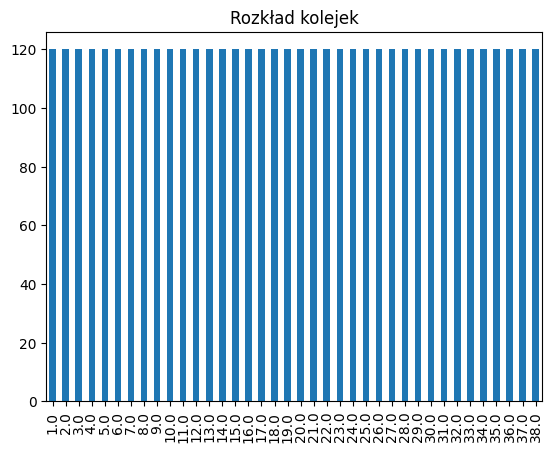

In [19]:
df['MW'].value_counts().sort_index().plot(kind='bar', title='Rozkład kolejek')


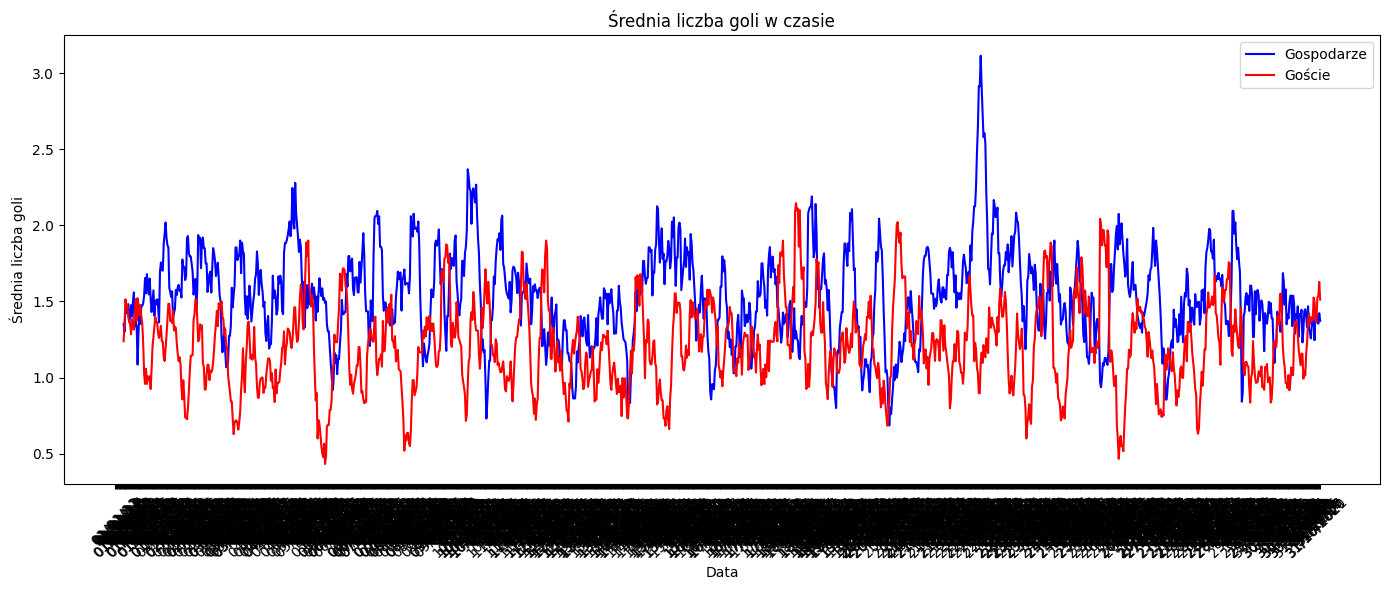

In [20]:
plt.figure(figsize=(14, 6))
plt.plot(df.groupby('Date')['FTHG'].mean().rolling(window=10).mean(), label='Gospodarze', color='blue')
plt.plot(df.groupby('Date')['FTAG'].mean().rolling(window=10).mean(), label='Goście', color='red')
plt.title('Średnia liczba goli w czasie')
plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Średnia liczba goli')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Średnia liczba goli gości w czasie'}, xlabel='Date'>

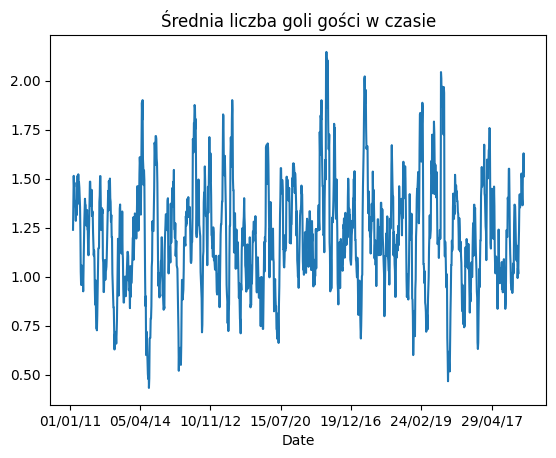

In [21]:
df.groupby('Date')['FTAG'].mean().rolling(window=10).mean().plot(title='Średnia liczba goli gości w czasie')


In [22]:
import plotly.express as px
# Wczytaj granice państw
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Wybierz Wielką Brytanię (UK)
uk = world[world['name'] == 'United Kingdom']

# Lista miast i współrzędnych stadionów dla drużyn z datasetu (przykładowe dane, uzupełnij jeśli trzeba)
team_locations = {
    'Arsenal': ('London', 51.554888, -0.108438),
    'Aston Villa': ('Birmingham', 52.509167, -1.884722),
    'Bournemouth': ('Bournemouth', 50.735278, -1.838333),
    'Brentford': ('London', 51.4881, -0.3022),
    'Brighton': ('Brighton', 50.8616, -0.0837),
    'Burnley': ('Burnley', 53.7891, -2.2303),
    'Cardiff': ('Cardiff', 51.4781, -3.2038),
    'Chelsea': ('London', 51.4816, -0.1910),
    'Crystal Palace': ('London', 51.3983, -0.0856),
    'Everton': ('Liverpool', 53.4388, -2.9663),
    'Fulham': ('London', 51.4746, -0.2216),
    'Huddersfield': ('Huddersfield', 53.6543, -1.7682),
    'Hull': ('Hull', 53.7468, -0.3677),
    'Leeds': ('Leeds', 53.7778, -1.5721),
    'Leicester': ('Leicester', 52.6203, -1.1422),
    'Liverpool': ('Liverpool', 53.4308, -2.9608),
    'Man City': ('Manchester', 53.4831, -2.2004),
    'Man United': ('Manchester', 53.4631, -2.2913),
    'Middlesbrough': ('Middlesbrough', 54.5781, -1.2171),
    'Newcastle': ('Newcastle', 54.9756, -1.6216),
    'Norwich': ('Norwich', 52.6220, 1.3092),
    'QPR': ('London', 51.5090, -0.2322),
    'Reading': ('Reading', 51.4222, -0.9822),
    'Sheffield United': ('Sheffield', 53.3703, -1.4715),
    'Southampton': ('Southampton', 50.9058, -1.3909),
    'Stoke': ('Stoke-on-Trent', 52.9886, -2.1753),
    'Sunderland': ('Sunderland', 54.9144, -1.3883),
    'Swansea': ('Swansea', 51.6422, -3.9347),
    'Tottenham': ('London', 51.6043, -0.0665),
    'Watford': ('Watford', 51.6498, -0.4015),
    'West Brom': ('West Bromwich', 52.5092, -1.9635),
    'West Ham': ('London', 51.5386, 0.0166),
    'Wigan': ('Wigan', 53.5472, -2.6536),
    'Wolves': ('Wolverhampton', 52.5903, -2.1303),
    'Blackburn': ('Blackburn', 53.7286, -2.4892),
    'Blackpool': ('Blackpool', 53.8058, -3.0486),
    'Bolton': ('Bolton', 53.5803, -2.5353),
}

# Przygotowanie danych do DataFrame
data = []
for team in df['HomeTeam'].unique():
    if team in team_locations:
        city, lat, lon = team_locations[team]
        data.append({'Team': team, 'City': city, 'Latitude': lat, 'Longitude': lon})

teams_df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(8, 10))
uk.plot(ax=ax, color='white', edgecolor='black')

plt.scatter(teams_df['Longitude'], teams_df['Latitude'], c='red', s=80, edgecolor='black', zorder=5)

plt.title('Lokalizacje drużyn na tle mapy Anglii')
plt.xlabel('Długość geograficzna')
plt.ylabel('Szerokość geograficzna')
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'gpd' is not defined

In [ ]:
!pip install geopandas
import geopandas as gpd


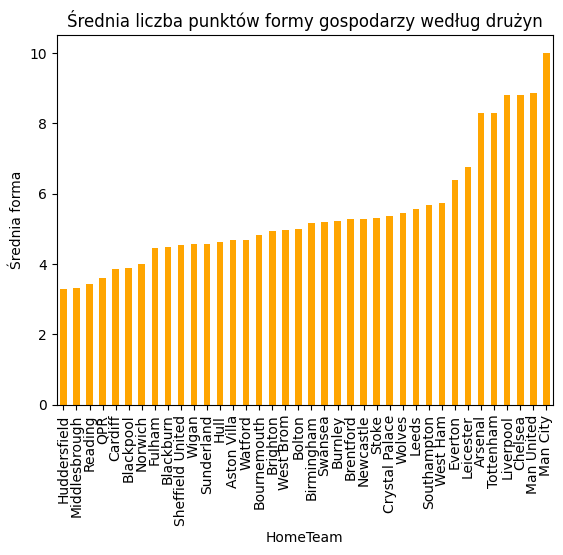

In [ ]:
df.groupby('HomeTeam')['HTFormPts'].mean().sort_values().plot(kind='bar', color='orange')
plt.title("Średnia liczba punktów formy gospodarzy według drużyn")
plt.ylabel("Średnia forma")
plt.xticks(rotation=90)
plt.show()


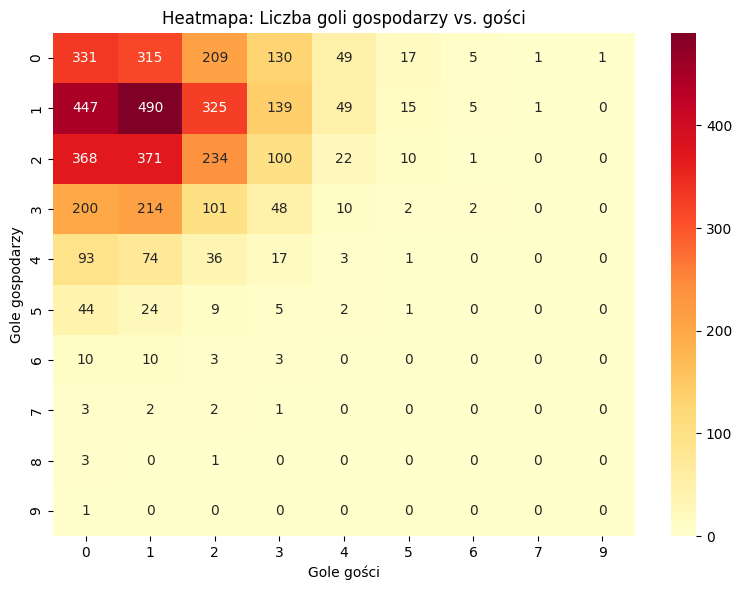

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(df['FTHG'], df['FTAG']), cmap='YlOrRd', annot=True, fmt='d')
plt.title('Heatmapa: Liczba goli gospodarzy vs. gości')
plt.xlabel('Gole gości')
plt.ylabel('Gole gospodarzy')
plt.tight_layout()
plt.show()

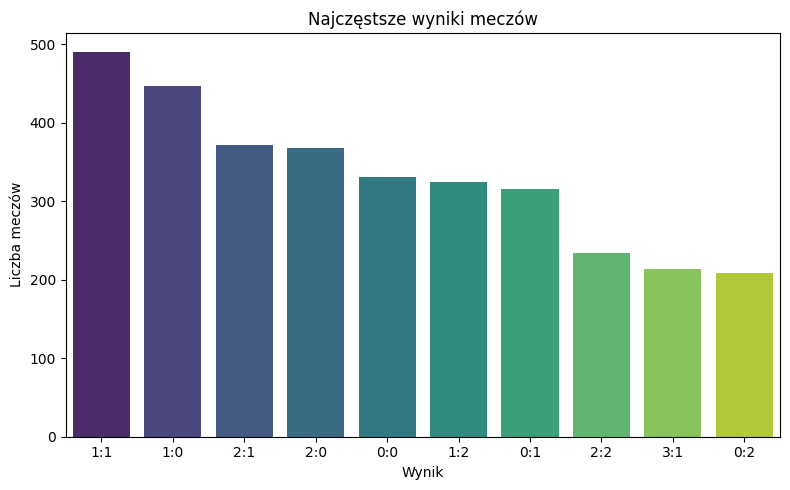

In [ ]:
df['score'] = df['FTHG'].astype(str) + ':' + df['FTAG'].astype(str)
top_scores = df['score'].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_scores.index, y=top_scores.values, palette='viridis')
plt.title('Najczęstsze wyniki meczów')
plt.xlabel('Wynik')
plt.ylabel('Liczba meczów')
plt.tight_layout()
plt.show()

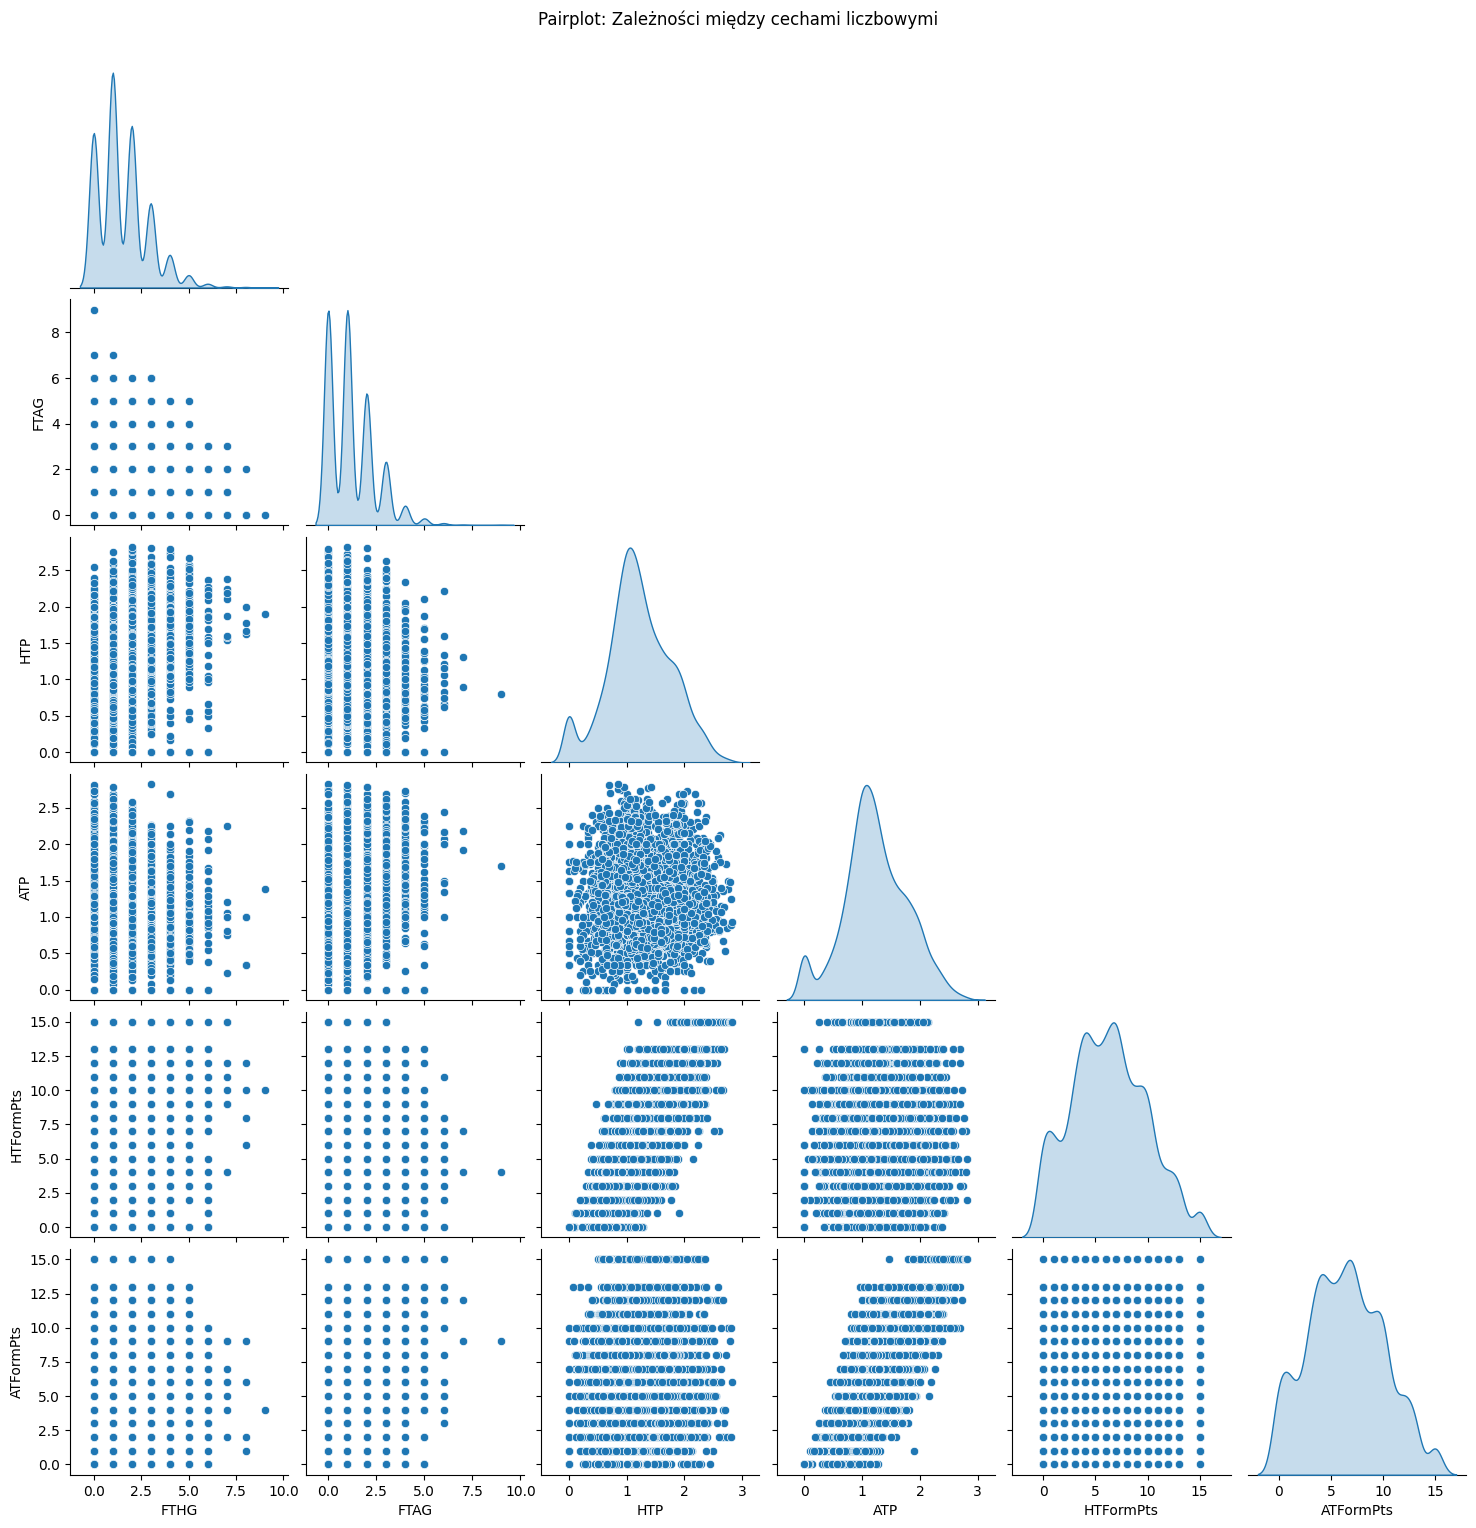

In [ ]:
sns.pairplot(df[['FTHG', 'FTAG', 'HTP', 'ATP', 'HTFormPts', 'ATFormPts']], diag_kind='kde', corner=True)
plt.suptitle('Pairplot: Zależności między cechami liczbowymi', y=1.02)
plt.show()

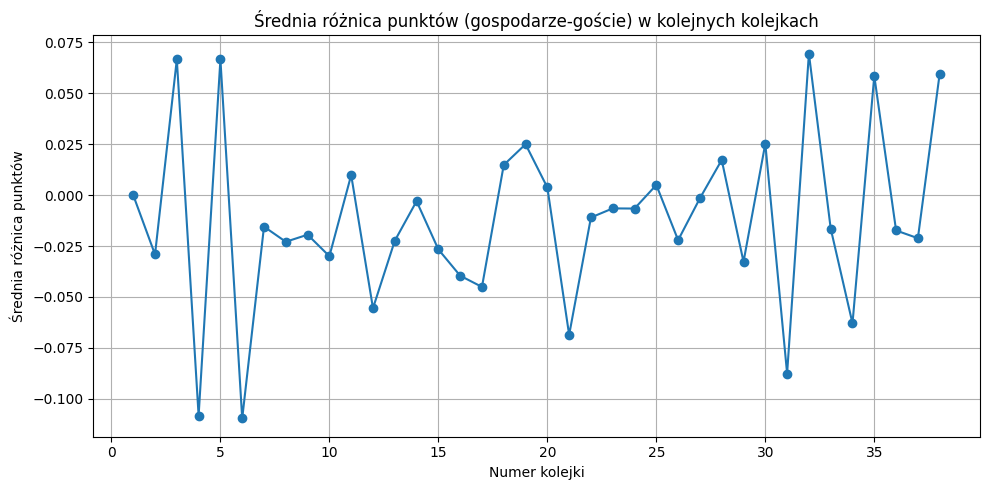

In [ ]:
plt.figure(figsize=(10, 5))
df.groupby('MW')['DiffPts'].mean().plot(marker='o')
plt.title('Średnia różnica punktów (gospodarze-goście) w kolejnych kolejkach')
plt.xlabel('Numer kolejki')
plt.ylabel('Średnia różnica punktów')
plt.grid(True)
plt.tight_layout()
plt.show()

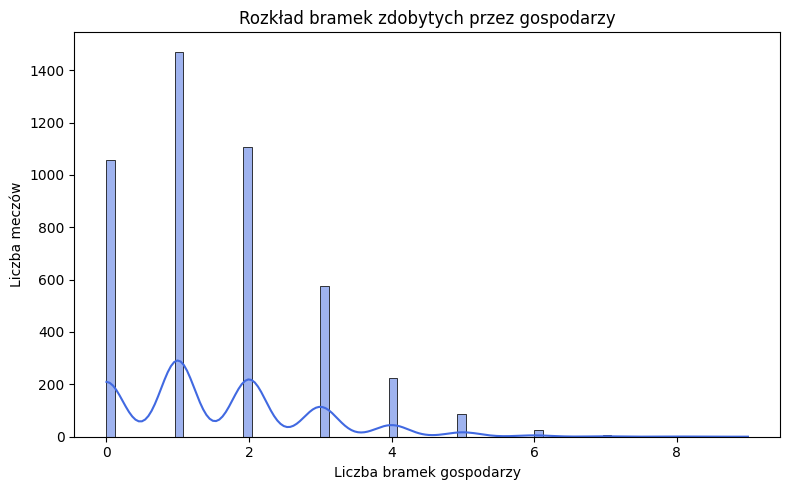

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['FTHG'], kde=True, color='royalblue')
plt.title('Rozkład bramek zdobytych przez gospodarzy')
plt.xlabel('Liczba bramek gospodarzy')
plt.ylabel('Liczba meczów')
plt.tight_layout()
plt.show()

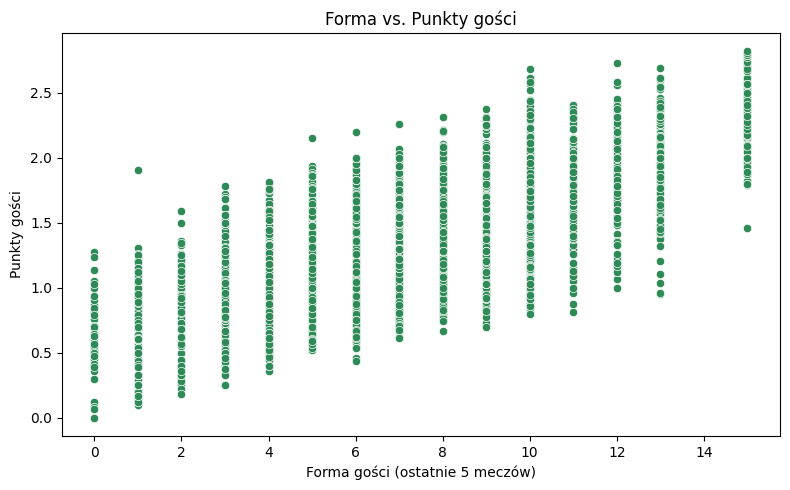

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='ATFormPts', y='ATP', data=df, color='seagreen')
plt.title('Forma vs. Punkty gości')
plt.xlabel('Forma gości (ostatnie 5 meczów)')
plt.ylabel('Punkty gości')
plt.tight_layout()
plt.show()

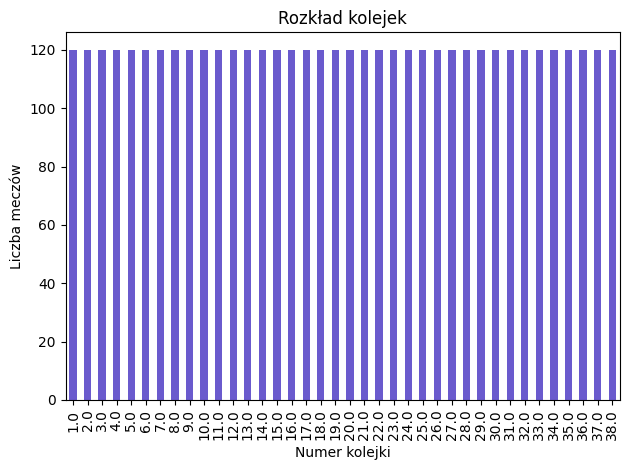

In [ ]:
df['MW'].value_counts().sort_index().plot(kind='bar', color='slateblue', title='Rozkład kolejek')
plt.xlabel('Numer kolejki')
plt.ylabel('Liczba meczów')
plt.tight_layout()
plt.show()

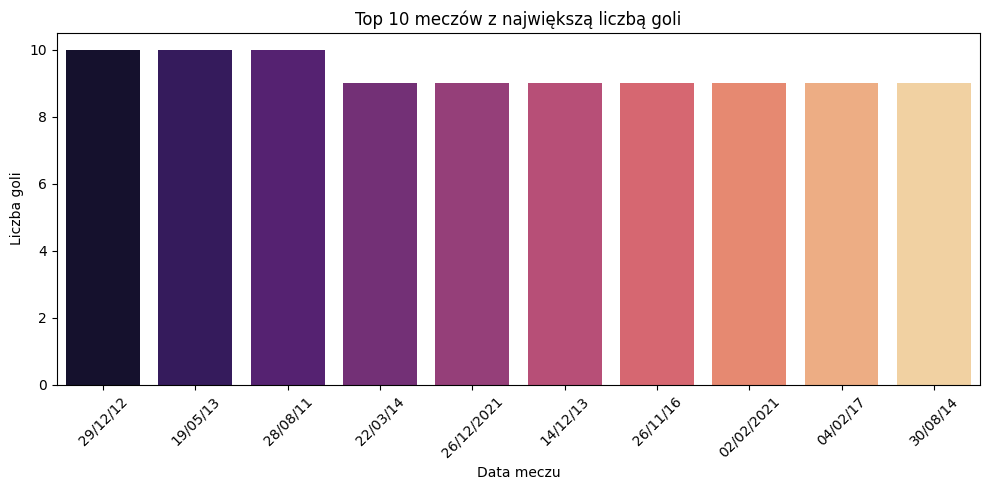

In [ ]:
df['TotalGoals'] = df['FTHG'] + df['FTAG']
top_matches = df.sort_values('TotalGoals', ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_matches['Date'], y=top_matches['TotalGoals'], palette='magma')
plt.title('Top 10 meczów z największą liczbą goli')
plt.xlabel('Data meczu')
plt.ylabel('Liczba goli')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

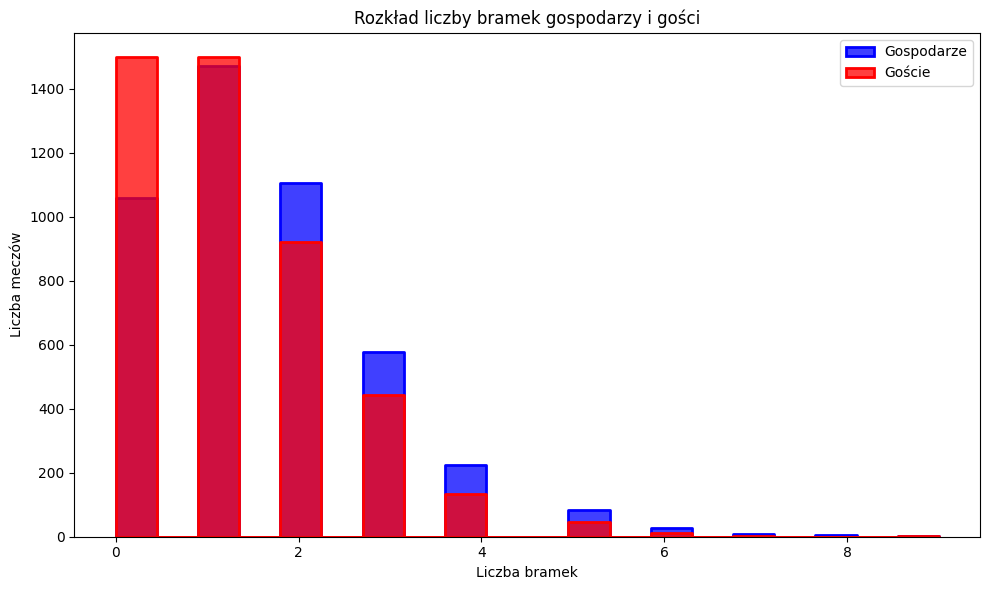

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['FTHG'], bins=20, color='blue', label='Gospodarze', kde=False, element="step", linewidth=2)
sns.histplot(df['FTAG'], bins=20, color='red', label='Goście', kde=False, element="step", linewidth=2)
plt.title("Rozkład liczby bramek gospodarzy i gości")
plt.xlabel("Liczba bramek")
plt.ylabel("Liczba meczów")
plt.legend()
plt.tight_layout()
plt.show()

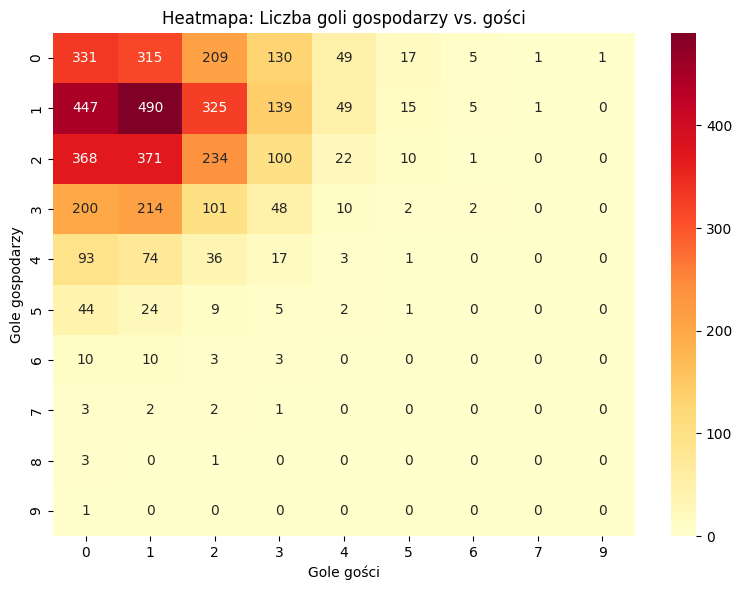

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(df['FTHG'], df['FTAG']), cmap='YlOrRd', annot=True, fmt='d')
plt.title('Heatmapa: Liczba goli gospodarzy vs. gości')
plt.xlabel('Gole gości')
plt.ylabel('Gole gospodarzy')
plt.tight_layout()
plt.show()

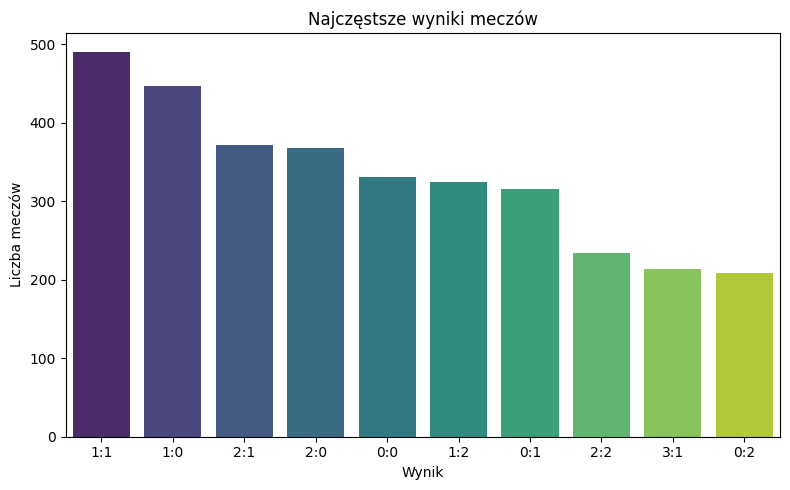

In [ ]:
df['score'] = df['FTHG'].astype(str) + ':' + df['FTAG'].astype(str)
top_scores = df['score'].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_scores.index, y=top_scores.values, palette='viridis')
plt.title('Najczęstsze wyniki meczów')
plt.xlabel('Wynik')
plt.ylabel('Liczba meczów')
plt.tight_layout()
plt.show()

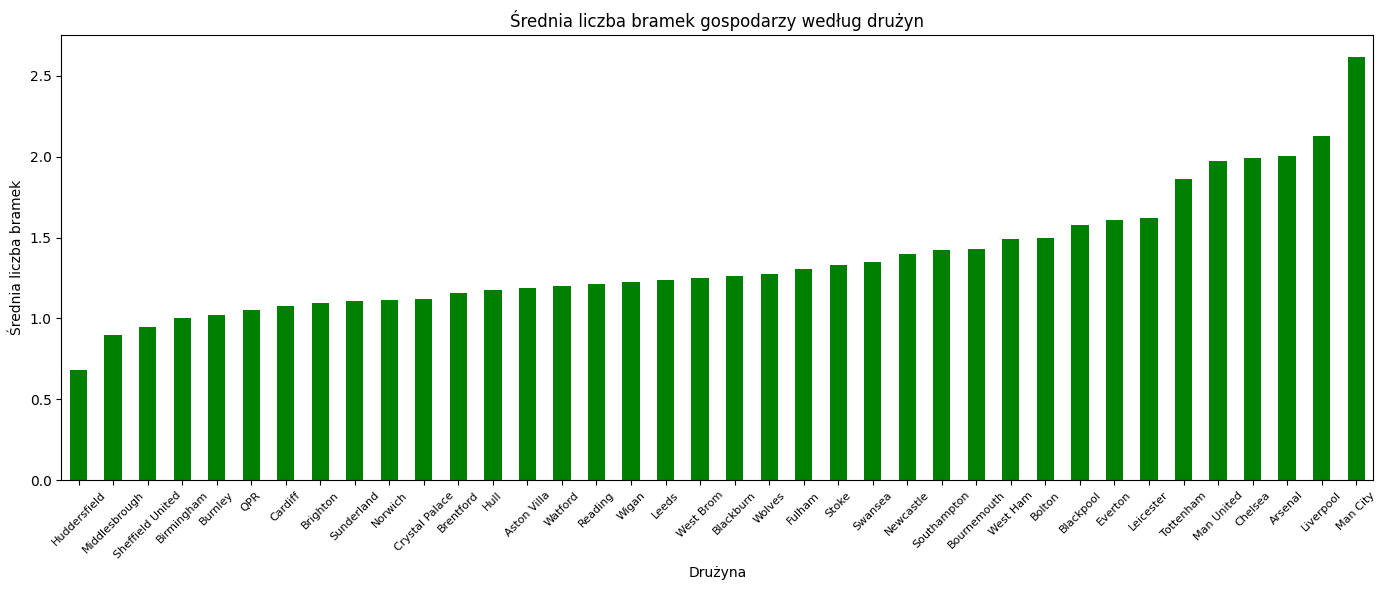

In [ ]:
plt.figure(figsize=(14, 6))
df.groupby('HomeTeam')['FTHG'].mean().sort_values().plot(kind='bar', color='green')
plt.title("Średnia liczba bramek gospodarzy według drużyn")
plt.ylabel("Średnia liczba bramek")
plt.xticks(rotation=45, fontsize=8)
plt.xlabel("Drużyna")
plt.tight_layout()
plt.show()

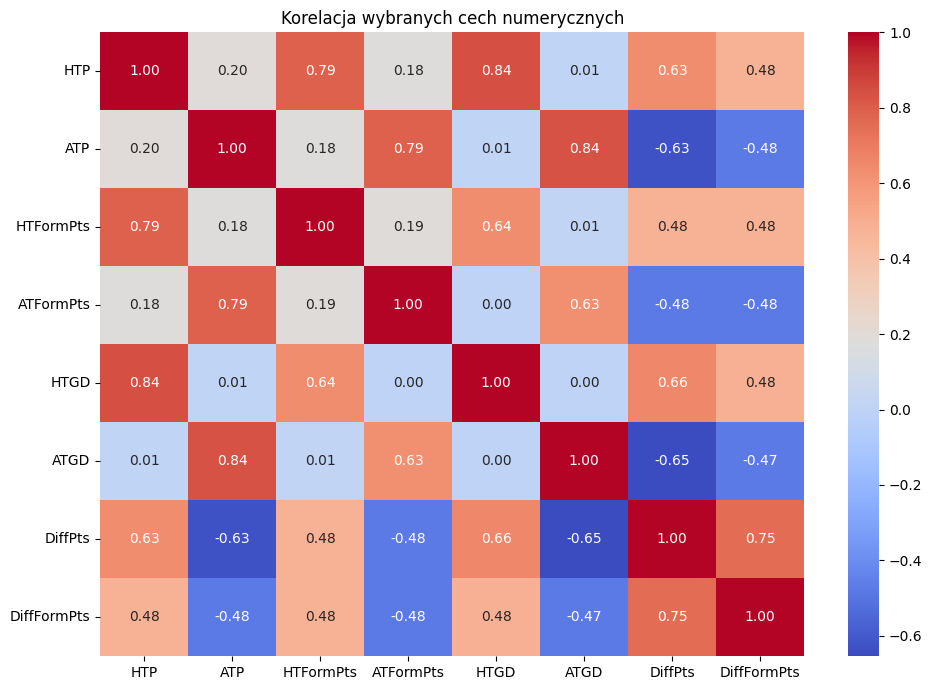

In [ ]:
important_features = ['HTP', 'ATP', 'HTFormPts', 'ATFormPts', 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts']
plt.figure(figsize=(10, 7))
sns.heatmap(df[important_features].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelacja wybranych cech numerycznych')
plt.tight_layout()
plt.show()

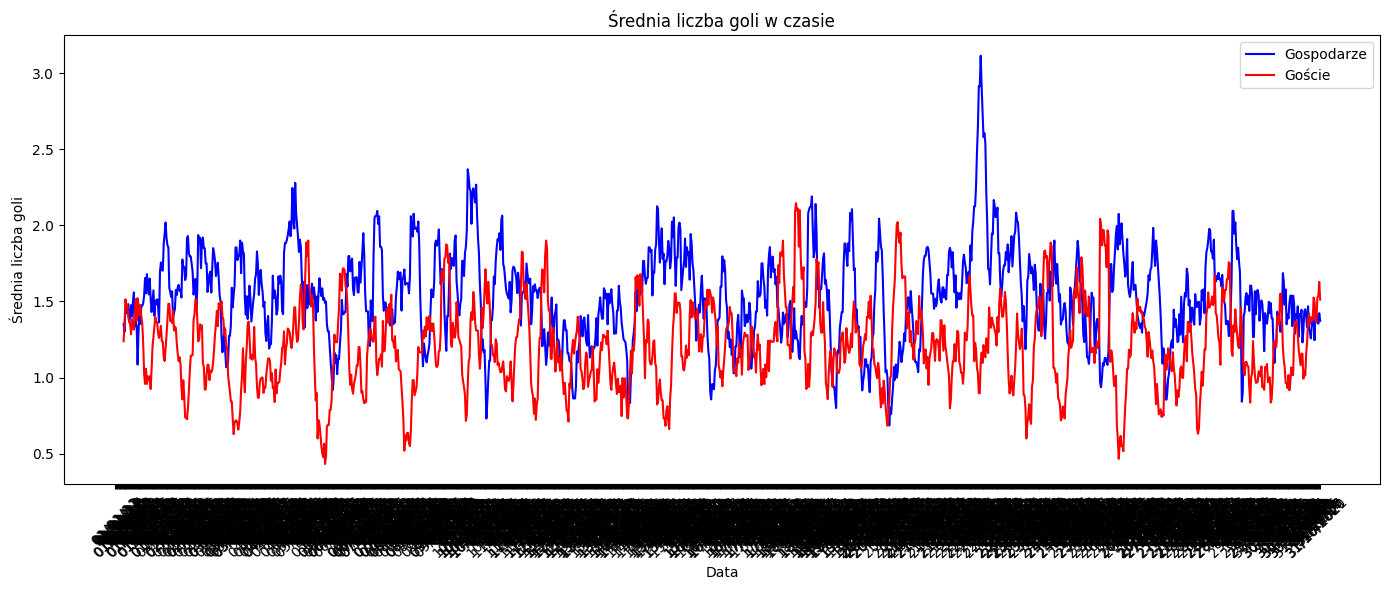

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df.groupby('Date')['FTHG'].mean().rolling(window=10).mean(), label='Gospodarze', color='blue')
plt.plot(df.groupby('Date')['FTAG'].mean().rolling(window=10).mean(), label='Goście', color='red')
plt.title('Średnia liczba goli w czasie')
plt.xlabel('Data')
plt.ylabel('Średnia liczba goli')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: ylabel='Count'>

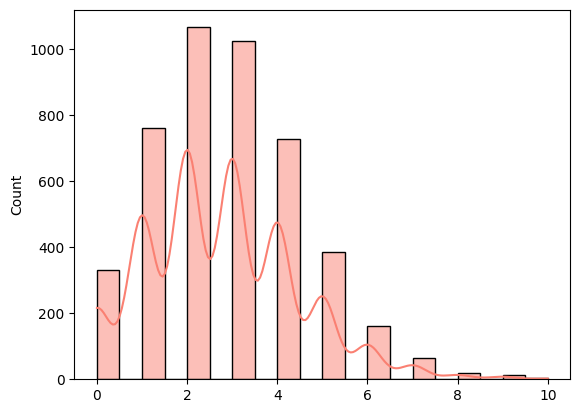

In [23]:
sns.histplot(df['FTHG'] + df['FTAG'], bins=20, kde=True, color='salmon')


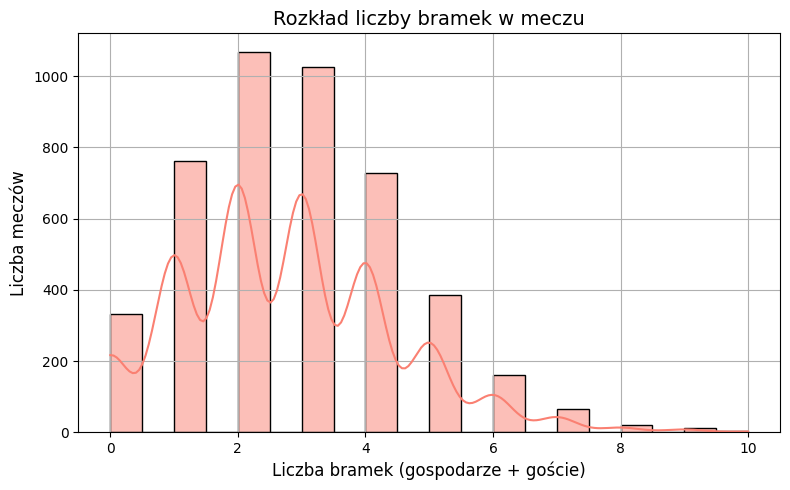

In [27]:
df['TotalGoals'] = df['FTHG'] + df['FTAG']
plt.figure(figsize=(8, 5))
sns.histplot(df['TotalGoals'], bins=20, kde=True, color='salmon')
plt.title('Rozkład liczby bramek w meczu', fontsize=14)
plt.xlabel('Liczba bramek (gospodarze + goście)', fontsize=12)
plt.ylabel('Liczba meczów', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()